<a href="https://colab.research.google.com/github/pratikshitvas/GDP-prediction_mutiple_models/blob/main/GDP_Dataset_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('edited_Copy of PANEL data for regression (GDP, X and M as Variables).csv')
data.head()

,COUNTRY ID,COUNTRY,YEAR,GDP,EXPORTS,IMPORTS
0,1,Afghanistan,1970,1731.44,85.57,114.0
1,1,Afghanistan,1971,1812.84,99.65,141.0
2,1,Afghanistan,1972,1647.90,122.47,164.0
3,1,Afghanistan,1973,1702.72,143.21,172.0
4,1,Afghanistan,1974,2061.73,230.00,243.0


In [ ]:
data.COUNTRY = [s.strip() for s in data.COUNTRY]

In [ ]:
country_names = list(data.COUNTRY.unique())
#country_names

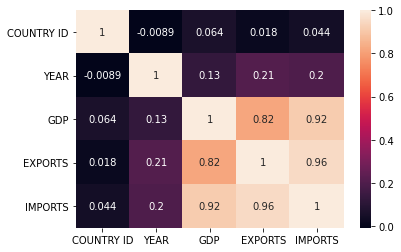

In [ ]:
sns.heatmap(data.corr(), annot=data.corr())

In [ ]:
def item_counter(df,split_features,unique_attributes):
    lst = []
    for i in unique_attributes:
        item = df.loc[df[split_features]==i]
        lst.append(item)
    return lst

In [ ]:
country_wize_list = item_counter(data,'COUNTRY',country_names)
#print('\n\n'.join('{}' for _ in range(len(country_wize_list))).format(*country_wize_list))

In [ ]:
print(len(country_wize_list),len(country_names))

218 218


In [ ]:
type(country_wize_list[0])

pandas.core.frame.DataFrame

**linear regression**

In [ ]:
dictionary = {}
for i in country_names:
    for j in country_wize_list:
        if j.COUNTRY.unique() == i:
            model = LinearRegression().fit(j[['COUNTRY ID','YEAR','EXPORTS','GDP']],j.IMPORTS)
            dictionary[i] = model

In [ ]:
a = dictionary['Afghanistan']

In [ ]:
a.predict([[1,2020,6000.27,13000]])

array([4198.61963469])

In [ ]:
from sklearn.metrics import r2_score
for i in dictionary.keys():
    for j in country_wize_list:
        if j.COUNTRY.unique() == i:
            prediction = dictionary[i].predict(j[['COUNTRY ID','YEAR','EXPORTS','GDP']])
            print(r2_score(prediction,j.IMPORTS))

0.9677763124491325
0.9909720169640759
0.9620855768291193
0.9453680398080598
0.9556051325339159
0.8954464460288951
0.92330314244953
0.9854233969152965
0.973928211196585
0.9867321827535122
0.9945468551572096
0.9986713386337878
0.9434387914022008
0.9268155848906559
0.936644416216757
0.9943796289551627
0.9765567009166269
0.9903966150992184
0.9989943836593449
0.9880805806038526
0.9834565746896581
0.9477891787960824
0.9699836346489366
0.9942727375010915
0.9681327786279158
0.9371725695036079
0.9844909011223757
0.8968503969807518
0.8466331711130735
0.9692578988202087
0.974548578133882
0.93374131240795
0.9864769800508606
0.9939814087017513
0.9505392677526285
0.996780866359228
0.9829170837308793
0.7414778831603814
0.9348760592245292
0.9881043955993156
0.9942880902140545
0.9981827327037025
0.9872310325510467
0.995474010402662
0.9897004024351518
0.8792691516299146
0.6555797149245888
0.9240987013791727
0.9629827154203251
0.9902885673042042
0.9571058759023675
0.9676328240416701
0.8800715416010361
0.

**PRIDECTING imports USING ONLY GDP**

In [ ]:
dictionary_1 = {}
for i in country_names:
    for j in country_wize_list:
        if j.COUNTRY.unique() == i:
            model = LinearRegression().fit(j[['COUNTRY ID','YEAR','GDP']],j.IMPORTS)
            dictionary_1[i] = model

In [ ]:
a = dictionary_1['Afghanistan']

In [ ]:
a.predict([[1,2020,600.27]])

array([145.81541156])

**PREDICTING IMPORTS using exports**

In [ ]:
dictionary_2= {}
for i in country_names:
    for j in country_wize_list:
        if j.COUNTRY.unique() == i:
            model = LinearRegression().fit(j[['COUNTRY ID','YEAR','EXPORTS']],j.IMPORTS)
            dictionary_2[i] = model

In [ ]:
a = dictionary_2['Afghanistan']

In [ ]:
a.predict([[1,1997,400.27]])

array([2708.96532523])

**PREDICTING EXPORTS**

In [ ]:
dictionary_E= {}
for i in country_names:
    for j in country_wize_list:
        if j.COUNTRY.unique() == i:
            model = LinearRegression().fit(j[['COUNTRY ID','YEAR','IMPORTS','GDP']],j.EXPORTS)
            dictionary_E[i] = model

In [ ]:
a = dictionary_E['Afghanistan']

In [ ]:
a.predict([[1,2020,6000.27,13000]])

array([414.76265317])

**EXPORTS USING GDP ONLY**

In [ ]:
dictionary_G = {}
for i in country_names:
    for j in country_wize_list:
        if j.COUNTRY.unique() == i:
            model = LinearRegression().fit(j[['COUNTRY ID','YEAR','GDP']],j.EXPORTS)
            dictionary_G[i] = model

In [ ]:
a = dictionary_G['Afghanistan']

In [ ]:
a.predict([[1,2020,13000]])

array([438.04260836])

**EXPORTS USING IMPORTS**

In [ ]:
dictionary_I = {}
for i in country_names:
    for j in country_wize_list:
        if j.COUNTRY.unique() == i:
            model = LinearRegression().fit(j[['COUNTRY ID','YEAR','IMPORTS']],j.EXPORTS)
            dictionary_I[i] = model

In [ ]:
a = dictionary_G['Afghanistan']
a.predict([[1,2020,300]])

array([74.13399577])

***SVM(EXPORTS)***

In [ ]:
data.dtypes

COUNTRY ID      int64
COUNTRY        object
YEAR            int64
GDP           float64
EXPORTS       float64
IMPORTS       float64
dtype: object

In [ ]:
data['COUNTRY'].value_counts()

Sao Tome and Principe           50
Haiti                           50
Denmark                         50
United States of America        50
Uruguay                         50
                                ..
Serbia                          12
Panama, excluding Canal Zone    11
Sint Maarten (Dutch part)        9
Curaçao                          9
Sudan                            8
Name: COUNTRY, Length: 218, dtype: int64

In [ ]:
x = data['GDP']
y = data['EXPORTS']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)
x_train.shape

(7595,)

In [ ]:
x_test.shape

(1899,)

In [ ]:
y_train.shape

(7595,)

In [ ]:
from sklearn import svm
svm.SVC(kernel='linear', gamma='auto', C=2)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
x_train[:5]

6367    3653.86
3682    7939.74
1900     244.30
5480    1035.62
1922    6265.86
Name: GDP, dtype: float64

In [ ]:
y_train[:5]

6367     272.40
3682    1158.80
1900      71.76
5480     424.40
1922    1866.00
Name: EXPORTS, dtype: float64

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svm.SVR(kernel='linear', gamma='auto', C=2)

SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
regressor=SVR(kernel='sigmoid',gamma = 'auto').fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svm_pred = regressor.predict(np.array(x_test).reshape(-1,1))

In [77]:
print(svm_pred)

[1801.720128   2540.51072671 1776.05944082 ... 1776.18758865 1819.26851185
 1784.38843404]


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, svm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_pred)))
print('R2_Score: ', metrics.r2_score(y_test, svm_pred))

MAE: 37850.87924697209
RMSE: 133402.17317326693
R2_Score:  -0.08075962260691494


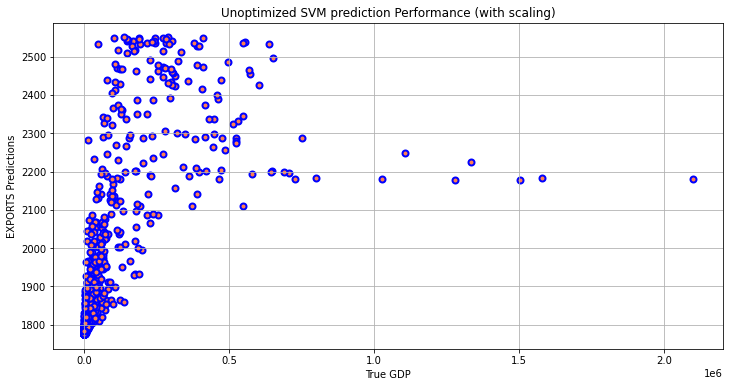

In [79]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,svm_pred, linewidths=2, edgecolors='b', color='coral')
plt.xlabel('True GDP') 
plt.ylabel('EXPORTS Predictions') 
plt.title('Unoptimized SVM prediction Performance (with scaling)') 
plt.grid()
plt.show()

**using RBF**

In [81]:

param_grid = {'C': [1, 10, 100], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-0.063, total=   2.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-0.061, total=   2.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-0.068, total=   2.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-0.086, total=   2.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-0.056, total=   2.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-0.063, total=   2.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-0.061, total=   2.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-0.068, total=   2.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-0.086, total=   2.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-0.056, total=   2.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.0001, kernel=rbf, score=-0.063, total=   2.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.0001, kernel=rbf, score=-0.061, total=   2.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.0001, kernel=rbf, score=-0.068, total=   2.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.0001, kernel=rbf, score=-0.086, total=   2.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.0001, kernel=rbf, score=-0.056, total=   2.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.063, total=   2.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.061, total=   2.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.068, total=   2.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.086, total=   2.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.056, total=   2.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.063, total=   2.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.061, total=   2.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.068, total=   2.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.086, total=   2.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.056, total=   2.2s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0001, kernel=rbf, score=-0.062, total=   2.4s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0001, kernel=rbf, score=-0.060, total=   2.4s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0001, kernel=rbf, score=-0.067, total=   2.4s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0001, kernel=rbf, score=-0.084, total=   2.4s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0001, kernel=rbf, score=-0.055, total=   2.4s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.01, kernel=rbf, score=-0.062, total=   2.2s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.01, kernel=rbf, score=-0.060, total=   2.2s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.01, kernel=rbf, score=-0.067, total=   2.2s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.01, kernel=rbf, score=-0.084, total=   2.2s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.01, kernel=rbf, score=-0.055, total=   2.2s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.001, kernel=rbf, score=-0.058, total=   2.3s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.001, kernel=rbf, score=-0.057, total=   2.3s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.001, kernel=rbf, score=-0.063, total=   2.3s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.001, kernel=rbf, score=-0.079, total=   2.3s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.001, kernel=rbf, score=-0.052, total=   2.3s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.053, total=   2.5s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.051, total=   2.5s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.057, total=   2.5s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.070, total=   2.5s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.047, total=   2.5s


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.7min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [84]:
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(np.array(x_test).reshape(-1,1))

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, grid_predictions))

MAE: 36361.24018640337
RMSE: 132455.91487302986
R2_Score:  -0.06548175011196222


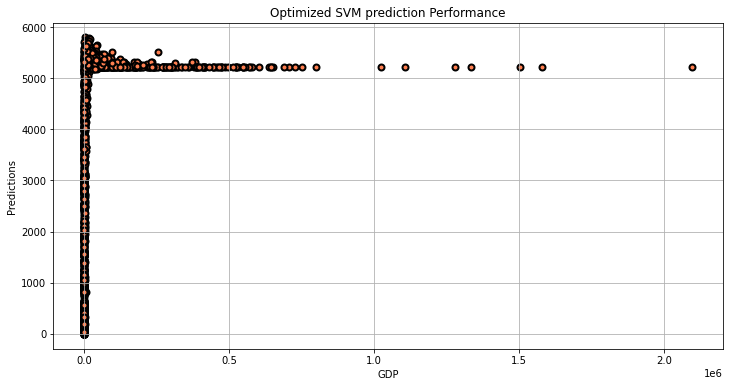

In [86]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('GDP') 
plt.ylabel('Predictions') 
plt.title('Optimized SVM prediction Performance') 
plt.grid()
plt.show()